# Microsoft Movie Studio Analysis
The purpose of this analysis is to come up with actionable insights based on the key findings to guide Microsoft's new movie studio in making informed decisions about the types of films to create.To address this problem, the project will dive into data-driven analysis to uncover the genres, runtimes, and studios that define success in the world of movie making.

KEY STAKE HOLDERS
1.The Head of Microsoft's New Movie Studio:He/She is responsible for making strategic decisions about the types of films to     produce. They need the insights to guide the studio's film production strategy.
2.Microsoft Executives:These are stakeholders because they ensure the success of the new movie studio aligns with the company's broader goals and strategies. They are interested in the project's outcomes and recommendations.
3.Marketing and Distribution Teams:These teams within Microsoft are concerned with how the films are marketed and distributed. They can benefit from insights about which types of films are currently popular and how to best promote and distribute them.
4.Investors and Shareholders:The investors and shareholders have a financial interest in the success of the new movie studio.Therefore ,they ensure the findings will impact on sales and seehow it impacts positively to the studio sales.

In [82]:
# Loading needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

SOURCE OF DATA
-::learn-co-curriculum github repository

Files used:
1.imdb.title.basics csv file
2.imdb.title.ratings csv file
3.bom.movie_gross csv file

I chose this dataset to explore the following insights that could be achieved from this data:
 1.Runtime Analysis - Explore if there are ideal runtime lengths associated with higher ratings. Recommend optimal target  runtime.
 2.Genre selection - Find the most popular genre based on the total frequency/count of that particular genre in terms of production.
 3.Production studios - Find the highest grossing production studios and seek to partner with such studios.

In [83]:
# Loading of the data
df1= pd.read_csv(r'C:\Users\user.DESKTOP-OMQ89VA\OneDrive\Documents\MORINGA PHASE 1 PROJECT\imdb.title.basics.csv\title.basics.csv')
df2= pd.read_csv(r'C:\Users\user.DESKTOP-OMQ89VA\OneDrive\Documents\MORINGA PHASE 1 PROJECT\imdb.title.ratings.csv\title.ratings.csv')

## Checking the Data and Datatypes

In [84]:
pd.set_option('display.max_rows',None)

In [85]:
df2.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [86]:
df1.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [87]:
df1.duplicated().sum()

0

In [88]:
df2.duplicated().sum()

0

In [89]:
df1.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [90]:
df1.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [91]:
df1.shape

(146144, 6)

In [92]:
df2.shape

(73856, 3)

In [93]:
df2.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [94]:
pd.reset_option('display.max_rows')

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## Data Preprocessing

In [97]:
# Dropped the original_title since it had null values and the primary_title had all the necessary rows
df1 = df1.drop('original_title', axis=1)

In [98]:
df1

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,2017,116.0,NaN


In [99]:
# Dropped all the other rows that had null values since I had enough data to work with and it wasnt possible to get a work around for the other missing values
df1=df1.dropna()

In [100]:
df1.shape

(112233, 5)

In [101]:
# Merged the two datasets using column tconst as the primary key and created df3 as the third dataframe that Id work with
df3 = df1.merge(df2, on='tconst')

In [102]:
df3

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...
65715,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,tt9913056,Swarm Season,2019,86.0,Documentary,6.2,5
65717,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [103]:
# Visualize the distribution of movie genres
# Split the genres into individual categories
genres_split = df3['genres'].str.split(',').explode()

In [104]:
genres_split

0             Action
0              Crime
0              Drama
1          Biography
1              Drama
            ...     
65716    Documentary
65717    Documentary
65718          Drama
65718         Family
65719    Documentary
Name: genres, Length: 118437, dtype: object

In [105]:
# Count the frequency of each genre
# Get the most popular genre by analyzing the count
genre_counts = genres_split.value_counts()
genre_counts

Drama          28394
Documentary    16423
Comedy         15514
Thriller        7583
Horror          6917
Action          6297
Romance         5976
Crime           4338
Biography       3693
Adventure       3621
Family          3231
Mystery         2889
History         2704
Sci-Fi          2048
Fantasy         1969
Music           1844
Animation       1615
Sport           1099
War              795
Musical          638
News             575
Western          256
Reality-TV        13
Game-Show          2
Adult              2
Short              1
Name: genres, dtype: int64

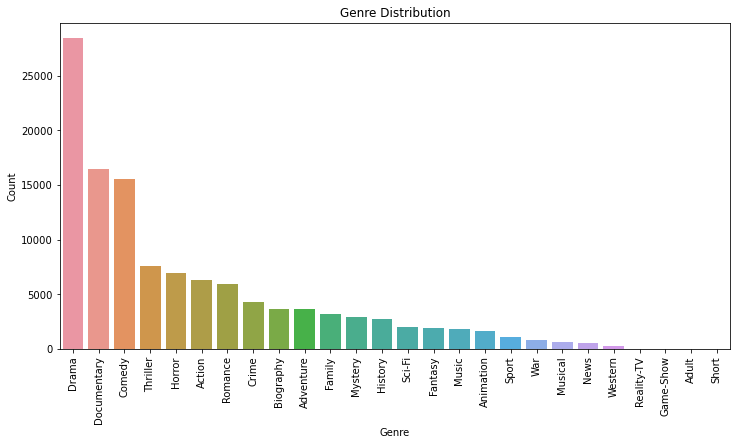

In [106]:
# Created a bargraph to showcase the frequency of each genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Based on the analysis of the genre data,Drama seems to be the most popular genre being produced.Id recommend to the new Microsoft studios to leverage on this by creating movies in this genre to appeal to a wider audience.

In [107]:
# Identify which genres have higher average ratings and number of votes
# Group the data by genre and calculate average ratings and total number of votes
genre_ratings_votes = df3.groupby('genres').agg({'averagerating': 'mean', 'numvotes': 'sum'}).reset_index()
genre_ratings_votes

,genres,averagerating,numvotes
0,Action,5.665187,319126
1,"Action,Adult,Comedy",5.900000,8
2,"Action,Adventure",5.059677,108835
3,"Action,Adventure,Animation",6.548734,3570049
4,"Action,Adventure,Biography",7.105556,999592
...,...,...,...
901,Thriller,5.603727,431778
902,"Thriller,War",5.650000,7166
903,"Thriller,Western",6.300000,13222
904,War,5.746667,5309


In [108]:
genre_ratings = df3.groupby('genres')['averagerating'].mean().reset_index()
genre_ratings

,genres,averagerating
0,Action,5.665187
1,"Action,Adult,Comedy",5.900000
2,"Action,Adventure",5.059677
3,"Action,Adventure,Animation",6.548734
4,"Action,Adventure,Biography",7.105556
...,...,...
901,Thriller,5.603727
902,"Thriller,War",5.650000
903,"Thriller,Western",6.300000
904,War,5.746667


In [109]:
# grouped the top genres based on the highest averaging rating
top_10_genres = genre_ratings.nlargest(10, 'averagerating')
top_10_genres

,genres,averagerating
442,"Comedy,Documentary,Fantasy",9.4
622,"Documentary,Family,Musical",9.3
824,Game-Show,9.0
668,"Documentary,News,Reality-TV",8.8
670,"Documentary,News,Sport",8.8
763,"Drama,Short",8.8
14,"Action,Adventure,Musical",8.7
185,"Adventure,Crime",8.5
410,"Biography,History,Music",8.5
866,"Music,Musical,Romance",8.4


Movies with the genre combination Comedy, Documentary & Fantasy have the highest average rating.Microsoft should consider producing movies in these genres as they tend to resonate with audiences.

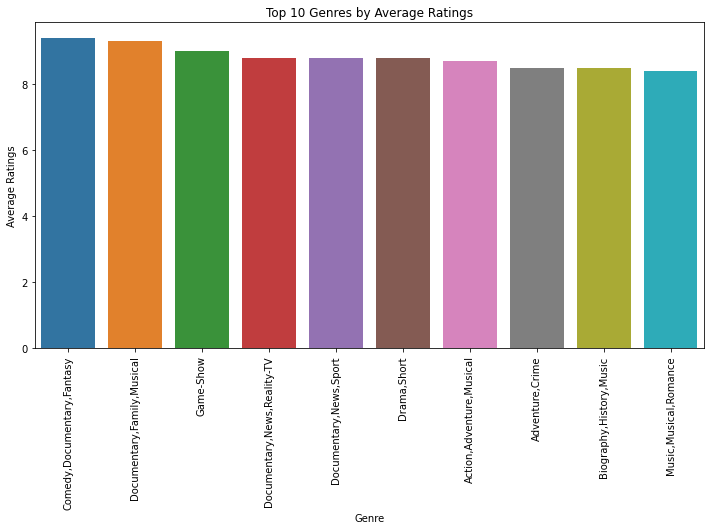

In [110]:
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='averagerating', data=top_10_genres)
plt.title('Top 10 Genres by Average Ratings')
plt.xlabel('Genre')
plt.ylabel('Average Ratings')
plt.xticks(rotation=90)
plt.show()

In [111]:

genre_numvotes = df3.groupby('genres')['numvotes'].mean().reset_index()
genre_numvotes

,genres,numvotes
0,Action,442.615811
1,"Action,Adult,Comedy",8.000000
2,"Action,Adventure",1755.403226
3,"Action,Adventure,Animation",22595.246835
4,"Action,Adventure,Biography",55532.888889
...,...,...
901,Thriller,335.231366
902,"Thriller,War",1791.500000
903,"Thriller,Western",6611.000000
904,War,176.966667


In [112]:
#grouped the top genres based on the highest number of votes
top_10_numvotes = genre_numvotes.nlargest(10, 'numvotes')
top_10_numvotes

,genres,numvotes
110,"Action,Fantasy,War",262978.000000
17,"Action,Adventure,Sci-Fi",187179.292683
257,"Adventure,Mystery,Sci-Fi",135042.500000
217,"Adventure,Drama,Sci-Fi",99316.950000
10,"Action,Adventure,Fantasy",96588.050000
401,"Biography,Drama,Thriller",88518.904762
19,"Action,Adventure,Thriller",81476.152174
15,"Action,Adventure,Mystery",80838.111111
69,"Action,Crime,Sci-Fi",78214.125000
776,"Family,Fantasy,Musical",59606.500000


Movies with the genre combination Action, Fantasy & War topped the leaderboard in number of votes, this combination is obviously a hit at the box office worldwide, make this the first type of movie to produce for success.

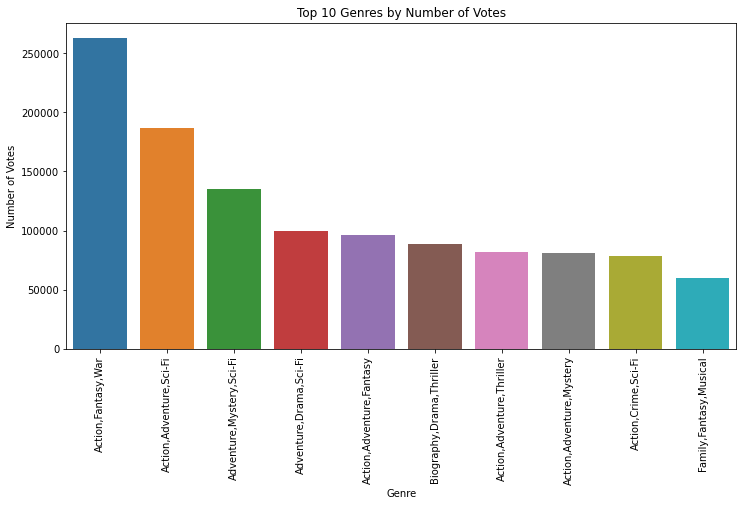

In [113]:
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='numvotes', data=top_10_numvotes)
plt.title('Top 10 Genres by Number of Votes')
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.xticks(rotation=90)
plt.show()

Visualize with runtime minutes and averaging ratings to get which average runtime minutes have higher ratings
I created bins for grouping data based on runtime minutes. These bins help organize and categorize the data into different groups, making it easier to analyze patterns or trends within each group.

In [114]:

# Create runtime bins
bin_edges = [0, 60, 90, 120, 150, float('inf')]
bin_labels = ['<60', '60-90', '90-120', '120-150', '150+']

In [115]:
# Bin the data based on runtime
df3['runtime_bins'] = pd.cut(df3['runtime_minutes'], bins=bin_edges, labels=bin_labels)
df3['runtime_bins']

0           150+
1         90-120
2        120-150
3          60-90
4          60-90
          ...   
65715    120-150
65716      60-90
65717      60-90
65718     90-120
65719      60-90
Name: runtime_bins, Length: 65720, dtype: category
Categories (5, object): ['<60' < '60-90' < '90-120' < '120-150' < '150+']

In [116]:
# Calculated the average ratings for each bin
average_ratings_by_runtime = df3.groupby('runtime_bins')['averagerating'].mean().reset_index()
average_ratings_by_runtime

,runtime_bins,averagerating
0,<60,7.124790
1,60-90,6.231207
2,90-120,6.245296
3,120-150,6.419724
4,150+,6.688738


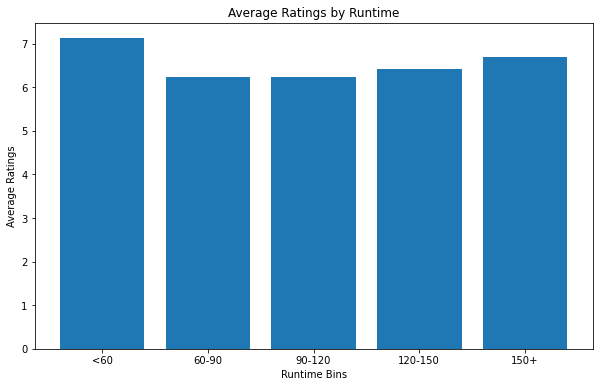

In [117]:
# Created a bar graph to visualize the average ratings by runtime
plt.figure(figsize=(10, 6))
plt.bar(average_ratings_by_runtime['runtime_bins'], average_ratings_by_runtime['averagerating'])
plt.xlabel('Runtime Bins')
plt.ylabel('Average Ratings')
plt.title('Average Ratings by Runtime')
plt.show()

Based on the runtime analysis,movie that had a runtime of 60 minutes and below had a higher rating.Microsoft new studio wouldthen be adviced to create movies within that time frame for optimum concentration from the viewers.

# Analysing the data using the BOM MOVIE GROSS

In [118]:
# Loading of the data
df5 = pd.read_csv(r'C:\Users\user.DESKTOP-OMQ89VA\OneDrive\Documents\MORINGA PHASE 1 PROJECT\bom.movie_gross.csv\bom.movie_gross.csv')
df5

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Data Preprocessing

In [119]:
df5.shape

(3387, 5)

In [120]:
df5.duplicated().sum()

0

In [121]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [122]:
df5.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [123]:
# Removed the , from the values in order to change the datatype
df5['foreign_gross'] = df5['foreign_gross'].str.replace(',', '')
df5['foreign_gross']

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382          NaN
3383          NaN
3384          NaN
3385          NaN
3386          NaN
Name: foreign_gross, Length: 3387, dtype: object

In [124]:
# Changed the data type of the foreign_gross column to float in order to perform calculations on it
df5['foreign_gross'] = df5['foreign_gross'].astype('float64')

In [125]:
df5.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [126]:
df5.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [127]:
df5[df5['studio'].isna() == 1]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000.0,2010
555,Fireflies in the Garden,NaN,70600.0,3300000.0,2011
933,Keith Lemon: The Film,NaN,NaN,4000000.0,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000.0,2017


In [128]:
# Dropped all the rows that had null values
df5=df5.dropna()

In [129]:
df5.shape

(2007, 5)

Creation of a new total gross column to find the total gross each studio was raking per movie.Eventually calculate the average total gross of each movie studio in order to find the highest grossing movie studios.

In [141]:
# Created a new column with the total of the domestic and foreign gross columns
Total_gross = df5['domestic_gross'] + df5['foreign_gross']
Total_gross

0       1.067000e+09
1       1.025500e+09
2       9.603000e+08
3       8.283000e+08
4       7.526000e+08
            ...     
3275    1.501400e+06
3286    9.540000e+05
3309    2.660000e+05
3342    9.840000e+04
3353    7.320000e+04
Length: 2007, dtype: float64

In [144]:
# Added the total gross column to the Dataframe
df5['Total_gross'] = df5['domestic_gross'] + df5['foreign_gross']

<ipython-input-144-eca1617685d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Total_gross'] = df5['domestic_gross'] + df5['foreign_gross']


In [145]:
df5

,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [146]:
# Grouped the data by 'studio' and calculate the average total gross
studio_avg_gross = df5.groupby('studio')['Total_gross'].mean().reset_index()
studio_avg_gross

,studio,Total_gross
0,3D,1.600000e+07
1,A24,2.625889e+07
2,AF,2.327500e+06
3,AGF,1.768000e+05
4,AR,5.805000e+07
...,...,...
167,WOW,4.940000e+04
168,Wein.,5.936091e+07
169,Yash,4.920575e+07
170,Zee,1.671000e+06


In [136]:
# Sort the studios by average total gross in descending order
studio_avg_gross_sorted = studio_avg_gross.sort_values(by='Total_gross', ascending=False)

In [147]:
studio_avg_gross_sorted

,studio,Total_gross
67,HC,8.703000e+08
116,P/DW,5.076500e+08
22,BV,4.249075e+08
66,GrtIndia,2.542000e+08
163,WB,2.368577e+08
...,...,...
36,Darin Southa,9.840000e+04
70,ICir,7.960000e+04
73,ITL,5.290000e+04
167,WOW,4.940000e+04


In [138]:
# Selected the top 10 studios based on the total gross
top_10_studios = studio_avg_gross_sorted.head(10)
top_10_studios

,studio,Total_gross
67,HC,8.703000e+08
116,P/DW,5.076500e+08
22,BV,4.249075e+08
66,GrtIndia,2.542000e+08
163,WB,2.368577e+08
164,WB (NL),2.344114e+08
57,Fox,2.311968e+08
142,Sony,2.133782e+08
126,Par.,2.068532e+08
155,Uni.,2.065751e+08


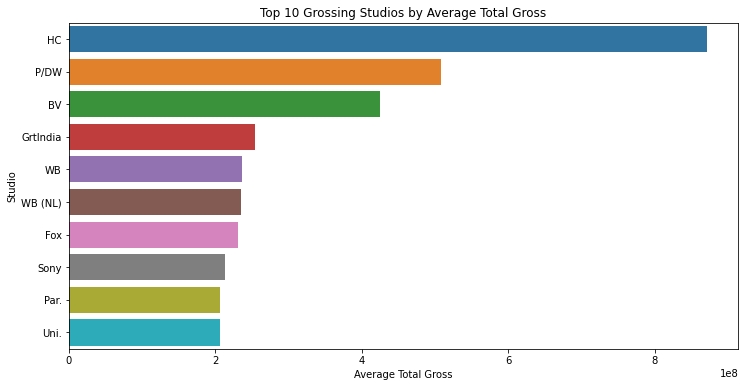

In [139]:
# Created a bar plot to visualize the top 10 grossing studios
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_gross', y='studio', data=top_10_studios)
plt.xlabel('Average Total Gross')
plt.ylabel('Studio')
plt.title('Top 10 Grossing Studios by Average Total Gross')
plt.show()



HC Studio has the highest average total gross among all the studios.Microsoft's new studio should seek to partner with HC based on its ability to rake in high gross.

# CONCLUSION
This analysis leads to three recommendations that could could be used by Microsoft in the launching of its movie studios:
Microsoft should seek to release movies with runtimes of 60 minutes and below since they tend to have higher average ratings.They should aim for movie runtimes within this range to maximize audience satisfaction.Most movies released are of the Drama genre and due to its requent production,Microsoft can look into incorporating drama into its movies since most releases are within that genre.HC being the studio with the highest average gross,Microsoft should seek to partner with HC studio for its movies production due to its high rating gross income.

